In [225]:
import pandas as pd
import numpy as np


#The above lines is for importing the required libraries

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#for showing the graphs in jupyter notebook

#The above lines are used for plotting purpose

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

#The above lines are for including libraries for model building purpose

In [228]:
pd.options.display.max_rows=9999

#To display maximum or complete data in the table

In [229]:
matches=pd.read_csv("matches.csv")
deliveries=pd.read_csv("deliveries.csv")

#loading the required datasets

In [230]:
matches.head()

id  season        city        date                  team1  \
0   1    2008   Bangalore  2008-04-18  Kolkata Knight Riders   
1   2    2008  Chandigarh  2008-04-19    Chennai Super Kings   
2   3    2008       Delhi  2008-04-19       Rajasthan Royals   
3   4    2008      Mumbai  2008-04-20         Mumbai Indians   
4   5    2008     Kolkata  2008-04-20        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kings           33   
2  normal           0             Delhi Daredevils            0   
3  normal           0  Royal Challengers Bangalore            0   
4  normal           0        Kolkata Knight Riders            0   

   win_by_wickets player_of_match                                       venue  \
0               0     BB McCullum                       M Chinnaswamy Stadium   
1               0      MEK Hussey  Punjab Cricket Association Stadium, Mohali   
2               9     MF Maharoof                            Feroz Shah Kotla   
3               5      MV Boucher                            Wankhede Stadium   
4               5       DJ Hussey                                Eden Gardens   

     umpire1         umpire2  umpire3  
0  Asad Rauf     RE Koertzen      NaN  
1  MR Benson      SL Shastri      NaN  
2  Aleem Dar  GA Pratapkumar      NaN  
3   SJ Davis       DJ Harper      NaN  
4  BF Bowden     K Hariharan      NaN

In [231]:
deliveries.head()

match_id  inning           batting_team                 bowling_team  over  \
0         1       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   
1         1       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   
2         1       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   
3         1       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   
4         1       1  Kolkata Knight Riders  Royal Challengers Bangalore     1   

   ball      batsman  non_striker   bowler  is_super_over  ...  bye_runs  \
0     1   SC Ganguly  BB McCullum  P Kumar              0  ...         0   
1     2  BB McCullum   SC Ganguly  P Kumar              0  ...         0   
2     3  BB McCullum   SC Ganguly  P Kumar              0  ...         0   
3     4  BB McCullum   SC Ganguly  P Kumar              0  ...         0   
4     5  BB McCullum   SC Ganguly  P Kumar              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            1            0             0             0           1   
1            0            0             0             0           0   
2            0            0             0             0           1   
3            0            0             0             0           0   
4            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           1               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           1               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           0               NaN            NaN     NaN  

[5 rows x 21 columns]

#displaying top5 rows in the datasets

In [232]:
tuple(matches['id'].unique())

(1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

#to display and finding the unique match IDs in the dataset or finding the unique matches in the  dataset

In [233]:
len(tuple(matches['id'].unique()))

577

In [234]:
deliveries["inning"].unique()

array([1, 2, 3, 4])

In [235]:
matches.shape

(577, 18)

In [236]:
deliveries.shape

(136598, 21)

In [237]:
list(matches.columns)

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [238]:
list(deliveries.columns)

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

#finding the columns in the deliveries dataset

In [239]:
len(matches)

577

In [240]:
len(deliveries)

136598

In [241]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

In [242]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          136598 non-null  int64 
 1   inning            136598 non-null  int64 
 2   batting_team      136598 non-null  object
 3   bowling_team      136598 non-null  object
 4   over              136598 non-null  int64 
 5   ball              136598 non-null  int64 
 6   batsman           136598 non-null  object
 7   non_striker       136598 non-null  object
 8   bowler            136598 non-null  object
 9   is_super_over     136598 non-null  int64 
 10  wide_runs         136598 non-null  int64 
 11  bye_runs          136598 non-null  int64 
 12  legbye_runs       136598 non-null  int64 
 13  noball_runs       136598 non-null  int64 
 14  penalty_runs      136598 non-null  int64 
 15  batsman_runs      136598 non-null  int64 
 16  extra_runs        136598 non-null  int

In [243]:
matches.describe()

id       season  dl_applied  win_by_runs  win_by_wickets  \
count  577.000000   577.000000  577.000000   577.000000      577.000000   
mean   289.000000  2012.029463    0.025997    13.715771        3.363951   
std    166.709828     2.486247    0.159263    23.619282        3.416049   
min      1.000000  2008.000000    0.000000     0.000000        0.000000   
25%    145.000000  2010.000000    0.000000     0.000000        0.000000   
50%    289.000000  2012.000000    0.000000     0.000000        3.000000   
75%    433.000000  2014.000000    0.000000    20.000000        6.000000   
max    577.000000  2016.000000    1.000000   144.000000       10.000000   

       umpire3  
count      0.0  
mean       NaN  
std        NaN  
min        NaN  
25%        NaN  
50%        NaN  
75%        NaN  
max        NaN

In [244]:
deliveries.describe()

match_id         inning           over           ball  \
count  136598.000000  136598.000000  136598.000000  136598.000000   
mean      288.564679       1.482738      10.144585       3.617125   
std       165.929865       0.501575       5.673901       1.808200   
min         1.000000       1.000000       1.000000       1.000000   
25%       145.000000       1.000000       5.000000       2.000000   
50%       289.000000       1.000000      10.000000       4.000000   
75%       432.000000       2.000000      15.000000       5.000000   
max       577.000000       4.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  136598.000000  136598.000000  136598.000000  136598.000000   
mean        0.000498       0.037782       0.004978       0.022372   
std         0.022306       0.260535       0.115512       0.201309   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  136598.000000  136598.000000  136598.000000  136598.000000   
mean        0.004480       0.000073       1.215311       0.069686   
std         0.074062       0.019132       1.589654       0.353357   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       6.000000       7.000000   

          total_runs  
count  136598.000000  
mean        1.284997  
std         1.579014  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         7.000000

In [245]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [246]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

#checking NULL values in the datasets in their respective columns

In [247]:
list1=matches.columns.to_list()

In [248]:
remove_from_list = ['id', 'date', 'toss_winner', 'toss_decision', 'winner', 
                    'win_by_runs', 'player_of_match', 'venue',
                    'umpire1', 'umpire2', 'umpire3']

In [249]:
for i in range(len(remove_from_list)):
    list1.remove(remove_from_list[i])

#finding and displaying the unique values in the respective columns and it's count

In [250]:
for i in list1:
    print('The unique values in', i, 'are: ', matches[i].unique(),'count is  ::',len(matches[i].unique()))

The unique values in season are:  [2008 2009 2010 2011 2012 2013 2014 2015 2016] count is  :: 9
The unique values in city are:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur'] count is  :: 31
The unique values in team1 are:  ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions'] count is  :: 13
The unique values in team2 are:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Decc

In [251]:
list2 = deliveries.columns.to_list()
remove_from_list2 = ['match_id', 'batsman','inning', 'non_striker', 
                     'bowler', 'player_dismissed', 'fielder']

In [252]:
for i in range(len(remove_from_list2)):
    list2.remove(remove_from_list2[i])

In [319]:
for i in list2:
    print('The unique values in', i, 'are: ', deliveries[i].unique())

The unique values in batting_team are:  ['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions']
The unique values in bowling_team are:  ['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions']
The unique values in over are:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
The unique values in ball are:  [1 2 3 4 5 6 7 8 9]
The unique values in is_super_over are:  [0 1]
The unique values in wide_runs are:  [0 1 5 2 3 4]
The unique values in bye_runs are:  [0 4 1 2 3]
The unique values in legbye_runs are:  [1 0 4 2 3 5]
The unique values in nob

In [254]:
totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

/tmp/ipykernel_5985/4137420231.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  totalrun_df=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


#grouping the data by match_id and innnings with total_runs

In [255]:
totalrun_df

match_id  inning  total_runs
0            1       1         222
1            1       2          82
2            2       1         240
3            2       2         207
4            3       1         129
5            3       2         132
6            4       1         165
7            4       2         166
8            5       1         110
9            5       2         112
10           6       1         166
11           6       2         168
12           7       1         142
13           7       2         143
14           8       1         208
15           8       2         202
16           9       1         214
17           9       2         217
18          10       1         182
19          10       2         116
20          11       1         135
21          11       2         138
22          12       1         147
23          12       2         152
24          13       1         154
25          13       2         155
26          14       1         158
27          14       2         162
28          15       1         178
29          15       2         165
30          16       1         137
31          16       2         138
32          17       1         191
33          17       2         181
34          18       1         164
35          18       2         167
36          19       1         196
37          19       2         151
38          20       1         169
39          20       2         172
40          21       1         165
41          21       2         171
42          22       1         178
43          22       2         169
44          23       1         162
45          23       2         133
46          24       1         109
47          24       2         110
48          25       1         126
49          25       2         127
50          26       1         144
51          26       2         148
52          27       1         103
53          27       2         104
54          28       1         187
55          28       2         188
56          29       1         129
57          29       2         124
58          30       1         140
59          30       2         141
60          31       1         122
61          31       2         126
62          32       1         181
63          32       2         163
64          33       1         204
65          33       2         181
66          34       1         156
67          34       2         159
68          35       1         143
69          35       2         144
70          36       1         133
71          36       2         110
72          37       1         156
73          37       2         158
74          38       1         221
75          38       2         180
76          39       1         194
77          39       2         182
78          40       1          67
79          40       2          68
80          41       1         118
81          41       2          94
82          42       1         197
83          42       2         132
84          43       1         178
85          43       2         153
86          44       1         149
87          44       2          55
88          45       1         154
89          45       2         158
90          46       1         147
91          46       2         150
92          47       1         189
93          47       2         188
94          48       1         126
95          48       2         112
96          49       1         175
97          49       2         178
98          50       1         176
99          50       2         179
100         51       1         211
101         51       2         201
102         52       1         156
103         52       2         153
104         53       1         174
105         53       2         175
106         54       1         145
107         54       2         146
108         55       1         147
109         55       2         148
110         56       1         192
111         56       2          87
112         57       1         112
113         57  

In [256]:
totalrun_df = totalrun_df[totalrun_df['inning']==1]

    #CONSIDERING ONLY 1st INNINGS SCORES OF THE RESPECTIVE MATCHES

In [257]:
totalrun_df

match_id  inning  total_runs
0            1       1         222
2            2       1         240
4            3       1         129
6            4       1         165
8            5       1         110
10           6       1         166
12           7       1         142
14           8       1         208
16           9       1         214
18          10       1         182
20          11       1         135
22          12       1         147
24          13       1         154
26          14       1         158
28          15       1         178
30          16       1         137
32          17       1         191
34          18       1         164
36          19       1         196
38          20       1         169
40          21       1         165
42          22       1         178
44          23       1         162
46          24       1         109
48          25       1         126
50          26       1         144
52          27       1         103
54          28       1         187
56          29       1         129
58          30       1         140
60          31       1         122
62          32       1         181
64          33       1         204
66          34       1         156
68          35       1         143
70          36       1         133
72          37       1         156
74          38       1         221
76          39       1         194
78          40       1          67
80          41       1         118
82          42       1         197
84          43       1         178
86          44       1         149
88          45       1         154
90          46       1         147
92          47       1         189
94          48       1         126
96          49       1         175
98          50       1         176
100         51       1         211
102         52       1         156
104         53       1         174
106         54       1         145
108         55       1         147
110         56       1         192
112         57       1         112
114         58       1         163
116         59       1         165
118         60       1         133
120         61       1         104
122         62       1         101
124         63       1         179
126         64       1         158
128         65       1         184
130         66       1         189
132         67       1         150
136         68       1         168
138         69       1         168
140         70       1         149
142         71       1         139
144         72       1         165
146         73       1         187
148         74       1         143
150         75       1         139
152         76       1         119
154         77       1         148
156         78       1         164
158         79       1         148
160         80       1         145
162         81       1         141
164         82       1         163
166         83       1         153
168         84       1         149
170         85       1         178
172         86       1         211
174         87       1         154
176         88       1         145
178         89       1         105
180         90       1         185
182         91       1         116
184         92       1         168
186         93       1         140
188         94       1         157
190         95       1         123
192         96       1         166
194         97       1         173
196         98       1         119
198         99       1         173
200        100       1         129
202        101       1         145
204        102       1         120
206        103       1         147
208        104       1         160
210        105       1         134
212        106       1         150
214        107       1         188
216        108       1         134
218        109       1         101
220        110       1         116
222        111       1         165
224        112       1         170
226        113       1         153
228        114  

In [258]:
totalrun_df['total_runs']=totalrun_df['total_runs']+1

/tmp/ipykernel_5985/2979469762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs']=totalrun_df['total_runs']+1


#setting the targets for the second innings

In [259]:
totalrun_df

match_id  inning  total_runs
0            1       1         223
2            2       1         241
4            3       1         130
6            4       1         166
8            5       1         111
10           6       1         167
12           7       1         143
14           8       1         209
16           9       1         215
18          10       1         183
20          11       1         136
22          12       1         148
24          13       1         155
26          14       1         159
28          15       1         179
30          16       1         138
32          17       1         192
34          18       1         165
36          19       1         197
38          20       1         170
40          21       1         166
42          22       1         179
44          23       1         163
46          24       1         110
48          25       1         127
50          26       1         145
52          27       1         104
54          28       1         188
56          29       1         130
58          30       1         141
60          31       1         123
62          32       1         182
64          33       1         205
66          34       1         157
68          35       1         144
70          36       1         134
72          37       1         157
74          38       1         222
76          39       1         195
78          40       1          68
80          41       1         119
82          42       1         198
84          43       1         179
86          44       1         150
88          45       1         155
90          46       1         148
92          47       1         190
94          48       1         127
96          49       1         176
98          50       1         177
100         51       1         212
102         52       1         157
104         53       1         175
106         54       1         146
108         55       1         148
110         56       1         193
112         57       1         113
114         58       1         164
116         59       1         166
118         60       1         134
120         61       1         105
122         62       1         102
124         63       1         180
126         64       1         159
128         65       1         185
130         66       1         190
132         67       1         151
136         68       1         169
138         69       1         169
140         70       1         150
142         71       1         140
144         72       1         166
146         73       1         188
148         74       1         144
150         75       1         140
152         76       1         120
154         77       1         149
156         78       1         165
158         79       1         149
160         80       1         146
162         81       1         142
164         82       1         164
166         83       1         154
168         84       1         150
170         85       1         179
172         86       1         212
174         87       1         155
176         88       1         146
178         89       1         106
180         90       1         186
182         91       1         117
184         92       1         169
186         93       1         141
188         94       1         158
190         95       1         124
192         96       1         167
194         97       1         174
196         98       1         120
198         99       1         174
200        100       1         130
202        101       1         146
204        102       1         121
206        103       1         148
208        104       1         161
210        105       1         135
212        106       1         151
214        107       1         189
216        108       1         135
218        109       1         102
220        110       1         117
222        111       1         166
224        112       1         171
226        113       1         154
228        114  

In [260]:
match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

#merging the matches and totalrun_df datasets based on match_id 

In [261]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20              Deccan Chargers   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22              Deccan Chargers   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24              Deccan Chargers   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27             Delhi Daredevils   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30             Delhi Daredevils   
17    18    2008       Hyderabad  2008-05-01              Deccan Chargers   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25              Deccan Chargers   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08             Delhi Daredevils   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09              Deccan Chargers   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11             Delhi Daredevils   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15             Delhi Daredevils   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
40    41    2008           Delhi  2008-05-17             Delhi Daredevils   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
43    44    2008         Kolkata  2008-05-18        Kolkata Knight Riders   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23              Deccan Chargers   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51

In [262]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20              Deccan Chargers   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22              Deccan Chargers   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24              Deccan Chargers   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27             Delhi Daredevils   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30             Delhi Daredevils   
17    18    2008       Hyderabad  2008-05-01              Deccan Chargers   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25              Deccan Chargers   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08             Delhi Daredevils   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09              Deccan Chargers   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11             Delhi Daredevils   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15             Delhi Daredevils   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
40    41    2008           Delhi  2008-05-17             Delhi Daredevils   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
43    44    2008         Kolkata  2008-05-18        Kolkata Knight Riders   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23              Deccan Chargers   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51

In [263]:
match_df['team1'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [264]:
teams = ['Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Delhi Capitals']

In [265]:
match_df.loc[match_df['team1']=='Deccan Chargers','team1']='Sunrisers Hyderabad'
match_df.loc[match_df['team1']=='Delhi Daredevils','team1']='Delhi Capitals'

In [266]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20          Sunrisers Hyderabad   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22          Sunrisers Hyderabad   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24          Sunrisers Hyderabad   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27               Delhi Capitals   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30               Delhi Capitals   
17    18    2008       Hyderabad  2008-05-01          Sunrisers Hyderabad   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25          Sunrisers Hyderabad   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08               Delhi Capitals   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09          Sunrisers Hyderabad   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11               Delhi Capitals   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15               Delhi Capitals   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
40    41    2008           Delhi  2008-05-17               Delhi Capitals   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
43    44    2008         Kolkata  2008-05-18        Kolkata Knight Riders   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23          Sunrisers Hyderabad   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51

In [267]:
list3=['team2','toss_winner','winner']

In [268]:
for i in list3:
    match_df.loc[match_df[i]=='Deccan Chargers',i]='Sunrisers Hyderabad'
    match_df.loc[match_df[i]=='Delhi Daredevils',i]='Delhi Capitals'
        

In [269]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20          Sunrisers Hyderabad   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22          Sunrisers Hyderabad   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24          Sunrisers Hyderabad   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27               Delhi Capitals   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30               Delhi Capitals   
17    18    2008       Hyderabad  2008-05-01          Sunrisers Hyderabad   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25          Sunrisers Hyderabad   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08               Delhi Capitals   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09          Sunrisers Hyderabad   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11               Delhi Capitals   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15               Delhi Capitals   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
40    41    2008           Delhi  2008-05-17               Delhi Capitals   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
43    44    2008         Kolkata  2008-05-18        Kolkata Knight Riders   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23          Sunrisers Hyderabad   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51

In [270]:
match_df = match_df[match_df['team1'].isin(teams)]

In [271]:
match_df = match_df[match_df['team2'].isin(teams)]

In [272]:
match_df['team1'].unique() 

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [273]:
match_df['team2'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [274]:
match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

/home/rgukt/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/rgukt/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [275]:
x=match_df[match_df['dl_applied']==1]

In [276]:
list5=x['player_of_match'].unique()

In [277]:
list5=list(list5)

In [278]:
list5

['DPMD Jayawardene',
 'M Ntini',
 'DL Vettori',
 'CH Gayle',
 'ML Hayden',
 'Iqbal Abdulla',
 'DW Steyn',
 'DA Warner',
 'V Kohli']

In [279]:
match_df['player_of_match'].value_counts()

YK Pathan            14
CH Gayle             13
DA Warner            12
SK Raina             12
MEK Hussey           11
RG Sharma            11
G Gambhir            11
AB de Villiers       10
JH Kallis            10
MS Dhoni             10
SE Marsh              9
SR Watson             9
V Sehwag              9
AM Rahane             9
SR Tendulkar          8
KA Pollard            8
DR Smith              8
V Kohli               8
AC Gilchrist          7
RA Jadeja             7
UT Yadav              6
AT Rayudu             6
A Nehra               6
AD Russell            6
M Vijay               6
Harbhajan Singh       6
A Mishra              6
RV Uthappa            5
JP Faulkner           5
DW Steyn              5
BJ Hodge              4
SC Ganguly            4
JP Duminy             4
GJ Maxwell            4
DPMD Jayawardene      4
ML Hayden             4
SL Malinga            4
KC Sangakkara         4
PA Patel              4
Mandeep Singh         3
SP Narine             3
Sandeep Sharma  

In [280]:
man_of_the_matches=match_df['player_of_match'].value_counts()

In [281]:
man_of_the_matches

YK Pathan            14
CH Gayle             13
DA Warner            12
SK Raina             12
MEK Hussey           11
RG Sharma            11
G Gambhir            11
AB de Villiers       10
JH Kallis            10
MS Dhoni             10
SE Marsh              9
SR Watson             9
V Sehwag              9
AM Rahane             9
SR Tendulkar          8
KA Pollard            8
DR Smith              8
V Kohli               8
AC Gilchrist          7
RA Jadeja             7
UT Yadav              6
AT Rayudu             6
A Nehra               6
AD Russell            6
M Vijay               6
Harbhajan Singh       6
A Mishra              6
RV Uthappa            5
JP Faulkner           5
DW Steyn              5
BJ Hodge              4
SC Ganguly            4
JP Duminy             4
GJ Maxwell            4
DPMD Jayawardene      4
ML Hayden             4
SL Malinga            4
KC Sangakkara         4
PA Patel              4
Mandeep Singh         3
SP Narine             3
Sandeep Sharma  

In [282]:
m_o_t_m=man_of_the_matches.to_dict()

In [283]:
mtm=list(m_o_t_m.keys())

In [284]:
mtm[0]
m_o_t_m['YK Pathan']

14

#The most man of the match awardee 

In [287]:
print("THE PLAYER WITH MOST MAN OF THE MATCH AWARDS IS ",mtm[0]," with ",m_o_t_m['YK Pathan']," times.")

THE PLAYER WITH MOST MAN OF THE MATCH AWARDS IS  YK Pathan  with  14  times.


In [288]:
#THE PLAYER WITH MOST MAN OF THE MATCH AWARDS IS  YK Pathan  with  14  times.

In [289]:
match_df = match_df[match_df['dl_applied']==0]

In [290]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20          Sunrisers Hyderabad   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22          Sunrisers Hyderabad   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24          Sunrisers Hyderabad   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27               Delhi Capitals   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30               Delhi Capitals   
17    18    2008       Hyderabad  2008-05-01          Sunrisers Hyderabad   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25          Sunrisers Hyderabad   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08               Delhi Capitals   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09          Sunrisers Hyderabad   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11               Delhi Capitals   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15               Delhi Capitals   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23          Sunrisers Hyderabad   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51    52    2008       Bangalore  2008-05-03  Royal Challengers Bangalore   
52    53    2008         Kolkata  2008-05-25              Kings XI Punjab   
53

In [291]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs'],
      dtype='object')

In [292]:
match_df

id  season            city        date                        team1  \
0      1    2008       Bangalore  2008-04-18        Kolkata Knight Riders   
1      2    2008      Chandigarh  2008-04-19          Chennai Super Kings   
2      3    2008           Delhi  2008-04-19             Rajasthan Royals   
3      4    2008          Mumbai  2008-04-20               Mumbai Indians   
4      5    2008         Kolkata  2008-04-20          Sunrisers Hyderabad   
5      6    2008          Jaipur  2008-04-21              Kings XI Punjab   
6      7    2008       Hyderabad  2008-04-22          Sunrisers Hyderabad   
7      8    2008         Chennai  2008-04-23          Chennai Super Kings   
8      9    2008       Hyderabad  2008-04-24          Sunrisers Hyderabad   
9     10    2008      Chandigarh  2008-04-25              Kings XI Punjab   
10    11    2008       Bangalore  2008-04-26  Royal Challengers Bangalore   
11    12    2008         Chennai  2008-04-26        Kolkata Knight Riders   
12    13    2008          Mumbai  2008-04-27               Mumbai Indians   
13    14    2008      Chandigarh  2008-04-27               Delhi Capitals   
14    15    2008       Bangalore  2008-04-28          Chennai Super Kings   
15    16    2008         Kolkata  2008-04-29        Kolkata Knight Riders   
16    17    2008           Delhi  2008-04-30               Delhi Capitals   
17    18    2008       Hyderabad  2008-05-01          Sunrisers Hyderabad   
18    19    2008          Jaipur  2008-05-01             Rajasthan Royals   
19    20    2008         Chennai  2008-05-02          Chennai Super Kings   
20    21    2008       Hyderabad  2008-05-25          Sunrisers Hyderabad   
21    22    2008      Chandigarh  2008-05-03              Kings XI Punjab   
22    23    2008          Mumbai  2008-05-04               Mumbai Indians   
23    24    2008          Jaipur  2008-05-04          Chennai Super Kings   
24    25    2008       Bangalore  2008-05-05  Royal Challengers Bangalore   
25    26    2008         Chennai  2008-05-06          Chennai Super Kings   
26    27    2008          Mumbai  2008-05-07             Rajasthan Royals   
27    28    2008           Delhi  2008-05-08               Delhi Capitals   
28    29    2008         Kolkata  2008-05-08        Kolkata Knight Riders   
29    30    2008          Jaipur  2008-05-09          Sunrisers Hyderabad   
30    31    2008       Bangalore  2008-05-28  Royal Challengers Bangalore   
31    32    2008         Chennai  2008-05-10          Chennai Super Kings   
32    33    2008       Hyderabad  2008-05-11        Kolkata Knight Riders   
33    34    2008          Jaipur  2008-05-11               Delhi Capitals   
34    35    2008      Chandigarh  2008-05-12  Royal Challengers Bangalore   
35    36    2008         Kolkata  2008-05-13        Kolkata Knight Riders   
36    37    2008          Mumbai  2008-05-14          Chennai Super Kings   
37    38    2008      Chandigarh  2008-05-28              Kings XI Punjab   
38    39    2008           Delhi  2008-05-15               Delhi Capitals   
39    40    2008          Mumbai  2008-05-16        Kolkata Knight Riders   
41    42    2008          Jaipur  2008-05-17             Rajasthan Royals   
42    43    2008       Hyderabad  2008-05-18               Mumbai Indians   
44    45    2008       Bangalore  2008-05-19  Royal Challengers Bangalore   
45    46    2008         Kolkata  2008-05-20        Kolkata Knight Riders   
46    47    2008          Mumbai  2008-05-21              Kings XI Punjab   
47    48    2008         Chennai  2008-05-21  Royal Challengers Bangalore   
48    49    2008      Chandigarh  2008-05-23          Sunrisers Hyderabad   
49    50    2008           Delhi  2008-05-24               Mumbai Indians   
50    51    2008         Chennai  2008-05-24             Rajasthan Royals   
51    52    2008       Bangalore  2008-05-03  Royal Challengers Bangalore   
52    53    2008         Kolkata  2008-05-25              Kings XI Punjab   
53

In [293]:
delivery_df = match_df.merge(deliveries,on='match_id')

In [295]:
delivery_df.head(5)

id  season       city        date                  team1  \
0   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
1   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
2   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
3   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
4   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... bye_runs  legbye_runs  noball_runs penalty_runs  \
0  normal           0  ...        0            1            0            0   
1  normal           0  ...        0            0            0            0   
2  normal           0  ...        0            0            0            0   
3  normal           0  ...        0            0            0            0   
4  normal           0  ...        0            0            0            0   

  batsman_runs extra_runs total_runs_y  player_dismissed  dismissal_kind  \
0            0          1            1               NaN             NaN   
1            0          0            0               NaN             NaN   
2            0          1            1               NaN             NaN   
3            0          0            0               NaN             NaN   
4            0          0            0               NaN             NaN   

   fielder  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 40 columns]

In [297]:
delivery_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [298]:
delivery_df.shape

(114445, 40)

In [299]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

/tmp/ipykernel_5985/3025607697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [301]:
delivery_df.head()

id  season       city        date                  team1  \
0   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
1   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
2   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
3   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
4   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... legbye_runs  noball_runs  penalty_runs  \
0  normal           0  ...           1            0             0   
1  normal           0  ...           0            0             0   
2  normal           0  ...           0            0             0   
3  normal           0  ...           0            0             0   
4  normal           0  ...           0            0             0   

  batsman_runs extra_runs total_runs_y player_dismissed  dismissal_kind  \
0            0          1            1              NaN             NaN   
1            0          0            0              NaN             NaN   
2            0          1            1              NaN             NaN   
3            0          0            0              NaN             NaN   
4            0          0            0              NaN             NaN   

   fielder  current_score  
0      NaN              1  
1      NaN              1  
2      NaN              2  
3      NaN              2  
4      NaN              2  

[5 rows x 41 columns]

In [302]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

In [305]:
delivery_df[['total_runs_x', 'current_score', 'runs_left']].head()

total_runs_x  current_score  runs_left
0           223              1        222
1           223              1        222
2           223              2        221
3           223              2        221
4           223              2        221

In [306]:
delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

In [322]:
delivery_df[['over', 'ball', 'balls_left']].head(5)

over  ball  balls_left
0     1     1         119
1     1     2         118
2     1     3         117
3     1     4         116
4     1     5         115

In [308]:
delivery_df['player_dismissed']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
114440          NaN
114441    CJ Jordan
114442          NaN
114443          NaN
114444          NaN
Name: player_dismissed, Length: 114445, dtype: object

In [309]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

In [314]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

In [315]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [316]:
delivery_df['player_dismissed'].unique()

array([1])

In [317]:
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values

delivery_df['wickets_left'] = 10-wickets

/tmp/ipykernel_5985/2699213961.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


In [323]:
delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [324]:
delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])

In [325]:
delivery_df.head(20)

id  season       city        date                  team1  \
0    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
1    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
2    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
3    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
4    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
5    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
6    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
7    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
8    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
9    1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
10   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
11   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
12   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
13   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
14   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
15   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
16   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
17   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
18   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
19   1    2008  Bangalore  2008-04-18  Kolkata Knight Riders   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
5   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
6   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
7   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
8   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
9   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
10  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
11  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
12  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
13  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
14  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
15  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
16  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
17  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
18  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
19  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

    result  dl_applied  ... total_runs_y  player_dismissed  dismissal_kind  \
0   normal           0  ...            1                 1             NaN   
1   normal           0  ...            0                 1             NaN   
2   normal           0  ...            1                 1             NaN   
3   normal           0  ...            0                 1             NaN   
4   normal           0  ...            0                 1             NaN   
5   normal           0  ...            0                 1             NaN   
6   normal           0  ...            1                 1             NaN   
7   normal           0  ...            0                 1             NaN   
8   normal           0  ...            4                 1             NaN   
9   normal           0  ...            4                 1             NaN   
10  normal           0  ...            6                 1             NaN   
11  normal           0  ...            4                 1             NaN   
12  no

In [326]:
delivery_df[['cur_run_rate', 'req_run_rate']].head(5)

cur_run_rate  req_run_rate
0           6.0     11.193277
1           3.0     11.288136
2           4.0     11.333333
3           3.0     11.431034
4           2.4     11.530435

In [330]:
def resultofmatch(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0
    
delivery_df['result'] = delivery_df.apply(resultofmatch,axis=1)

In [348]:
count=delivery_df['result'].value_counts()

<Axes: xlabel='result'>

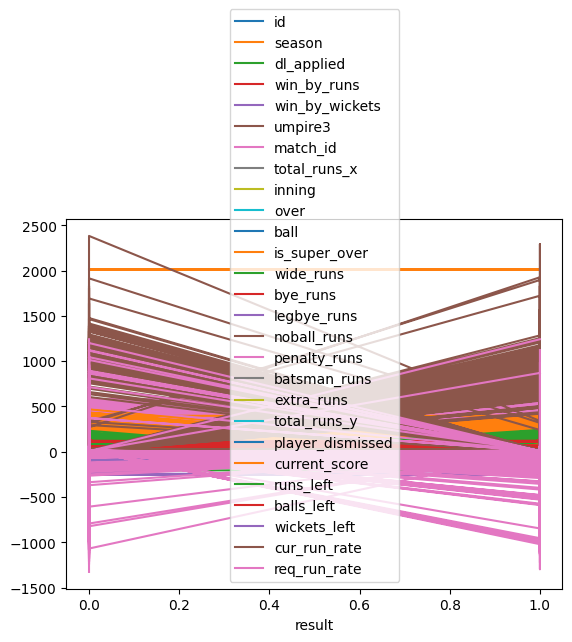

In [349]:
delivery_df.plot(x='result')

In [346]:
delivery_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets_left', 'cur_run_rate',
       'req_run_rate'],
      dtype='object')

In [350]:
count

0    67022
1    47423
Name: result, dtype: int64

<Axes: >

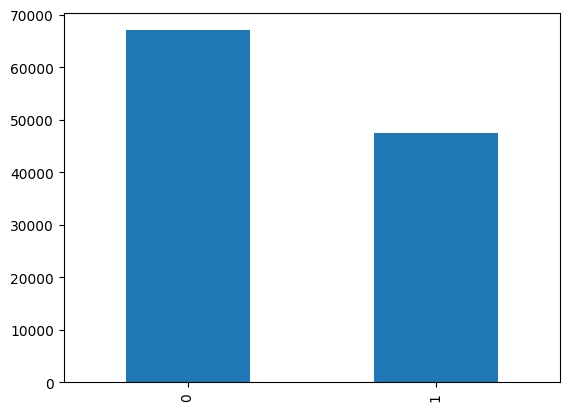

In [352]:
count.plot(kind='bar')

In [357]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets_left','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

In [358]:
final_df.head()

batting_team                 bowling_team       city  runs_left  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        222   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        222   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   

   balls_left  wickets_left  total_runs_x  cur_run_rate  req_run_rate  result  
0         119             9           223           6.0     11.193277       1  
1         118             8           223           3.0     11.288136       1  
2         117             7           223           4.0     11.333333       1  
3         116             6           223           3.0     11.431034       1  
4         115             5           223           2.4     11.530435       1

In [359]:
final_df.shape

(114445, 10)

In [360]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            1700
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
cur_run_rate       0
req_run_rate       0
result             0
dtype: int64

In [361]:
final_df = final_df.dropna()

In [362]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [363]:
final_df = final_df[final_df['balls_left'] != 0]

In [364]:
final_df

batting_team                 bowling_team       city  \
0             Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
1             Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
2             Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
3             Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
4             Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore   
...                             ...                          ...        ...   
114439  Royal Challengers Bangalore          Sunrisers Hyderabad  Bangalore   
114440  Royal Challengers Bangalore          Sunrisers Hyderabad  Bangalore   
114441  Royal Challengers Bangalore          Sunrisers Hyderabad  Bangalore   
114442  Royal Challengers Bangalore          Sunrisers Hyderabad  Bangalore   
114443  Royal Challengers Bangalore          Sunrisers Hyderabad  Bangalore   

        runs_left  balls_left  wickets_left  total_runs_x  cur_run_rate  \
0             222         119             9           223      6.000000   
1             222         118             8           223      3.000000   
2             221         117             7           223      4.000000   
3             221         116             6           223      3.000000   
4             221         115             5           223      2.400000   
...           ...         ...           ...           ...           ...   
114439       -191           5          -235           209     20.869565   
114440       -193           4          -236           209     20.793103   
114441       -193           3          -237           209     20.615385   
114442       -194           2          -238           209     20.491525   
114443       -195           1          -239           209     20.369748   

        req_run_rate  result  
0          11.193277       1  
1          11.288136       1  
2          11.333333       1  
3          11.431034       1  
4          11.530435       1  
...              ...     ...  
114439   -229.200000       0  
114440   -289.500000       0  
114441   -386.000000       0  
114442   -582.000000       0  
114443  -1170.000000       0  

[112122 rows x 10 columns]

In [365]:
data = final_df.copy()

In [366]:
test = data['result']

In [367]:
train = data.drop(['result'],axis = 1)

In [368]:
train.head()

batting_team                 bowling_team       city  runs_left  \
0  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        222   
1  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        222   
2  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   
3  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   
4  Kolkata Knight Riders  Royal Challengers Bangalore  Bangalore        221   

   balls_left  wickets_left  total_runs_x  cur_run_rate  req_run_rate  
0         119             9           223           6.0     11.193277  
1         118             8           223           3.0     11.288136  
2         117             7           223           4.0     11.333333  
3         116             6           223           3.0     11.431034  
4         115             5           223           2.4     11.530435

In [369]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((89697, 9), (22425, 9))

In [370]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

In [371]:
cf = ColumnTransformer(transformers = [
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [372]:
pipe = Pipeline(steps=[
    ('step1', cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [373]:
pipe.fit(X_train,y_train)

/home/rgukt/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [374]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6872240802675585


In [375]:
pipe.predict_proba(X_test)[10]

array([0.37726804, 0.62273196])

In [376]:
pipe2 = Pipeline(steps=[
    ('step1', cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)

/home/rgukt/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [377]:
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

0.9987959866220736


In [378]:
pipe2.predict_proba(X_test)[10]

array([0.02, 0.98])

In [379]:
import pickle

In [380]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [385]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Declaring the teams

teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Kings XI Punjab',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals']

# declaring the venues where the matches are going to take place

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
          'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
          'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
          'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
          'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
          'Sharjah', 'Mohali', 'Bengaluru']


# Loading our machine learning model from a saved pickle file

pipe = pickle.load(open('pipe.pkl', 'rb')) #remember all folders including pipe.pkl,
# notebook, datasets exist in the same directory

# Setting up the app's title

st.title('IPL Win Predictor')


# Setting up the layout with two columns
col1, col2 = st.columns(2)

# Creating a dropdown selector for the batting team
with col1:
    battingteam = st.selectbox('Select the batting team', sorted(teams))

# Creating a dropdown selector for the bowling team
with col2:

    bowlingteam = st.selectbox('Select the bowling team', sorted(teams))


# Creating a dropdown selector for the city where the match is being played
city = st.selectbox(
    'Select the city where the match is being played', sorted(cities))

# Creating a numeric input for the target score using number_input method in streamlit
target = int(st.number_input('Target', step=1))

# Setting up the layout with three columns
col3, col4, col5 = st.columns(3)

# Creating a numeric input for the current score
with col3:
    score = int(st.number_input('Score', step=1))

# Creating a numeric input for the number of overs completed
with col4:
    overs = int(st.number_input('Overs Completed', step=1))

# Creating a numeric input for the number of wickets fallen
with col5:
    wickets = int(st.number_input('Wickets Fallen', step=1))

# Checking for different match results based on the input provided
if score > target:
    st.write(battingteam,"won the match")
    
elif score == target-1 and overs==20:
    st.write("Match Drawn")
    
elif wickets==10 and score < target-1:
    st.write(bowlingteam, 'Won the match')
    
elif wickets==10 and score == target-1:
    st.write('Match tied')
    
elif battingteam==bowlingteam:
    st.write('To proceed, please select different teams because no match can be played between the same teams')

else:

    # Checking if the input values are valid or not
    if (target >= 0 and target <= 300  and overs >= 0 and overs <=20 and wickets <= 10 and wickets>=0 and score>= 0):
        try:

            if st.button('Predict Probability'):
                
                # Calculating the number of runs left for the batting team to win
                runs_left = target-score 
                
                # Calculating the number of balls left 
                balls_left = 120-(overs*6)
                
                # Calculating the number of wickets left for the batting team
                wickets = 10-wickets
                
                # Calculating the current Run-Rate of the batting team
                currentrunrate = score/overs
                
                # Calculating the Required Run-Rate for the batting team to win
                requiredrunrate = (runs_left*6)/balls_left
                               
                # Creating a pandas DataFrame containing the user inputs
                input_df = pd.DataFrame(
                               {'batting_team': [battingteam], 
                                'bowling_team': [bowlingteam], 
                                'city': [city], 
                                'runs_left': [runs_left], 
                                'balls_left': [balls_left],
                                'wickets': [wickets], 
                                'total_runs_x': [target], 
                                'cur_run_rate': [currentrunrate], 
                                'req_run_rate': [requiredrunrate]})
                # Loading the trained machine learning pipeline to make the prediction
                result = pipe.predict_proba(input_df)
                
                # Extracting the likelihood of loss and win
                lossprob = result[0][0]
                winprob = result[0][1]
                
                # Displaying the predicted likelihood of winning and losing in percentage

                st.header(battingteam+"- "+str(round(winprob*100))+"%")

                st.header(bowlingteam+"- "+str(round(lossprob*100))+"%")
                
                
        #Catching ZeroDivisionError         
        except ZeroDivisionError:
            st.error("Please fill all the details")
            
    #Displaying an error message if the input is incorrect        
    else:
        st.error('There is something wrong with the input, please fill the correct details')

2023-05-18 05:08:58.922 
  command:

    streamlit run /home/rgukt/.local/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
